In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16977, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 16977 (delta 89), reused 108 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (16977/16977), 15.72 MiB | 11.77 MiB/s, done.
Resolving deltas: 100% (11622/11622), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-10 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


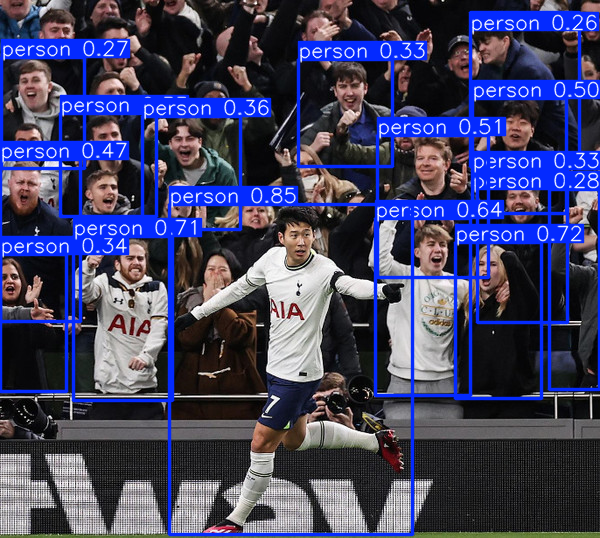

Saved 1 image to runs/detect/exp3


In [ ]:
# 모델과 필요한 라이브러리 임포트
import torch
from IPython.display import Image, display  # Colab에서 이미지 표시용

# 모델 로드 (기본 YOLOv5s 모델)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 이미지 경로
img_path = '/content/yolov5/data/images/88.jpg'

# 이미지에 대한 예측
results = model(img_path)

# 결과 시각화
results.show()  # Google Colab에서는 자동으로 표시됩니다
results.save()  # 저장된 결과 이미지는 yolov5/runs/detect/exp 디렉토리에 있습니다.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-10 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


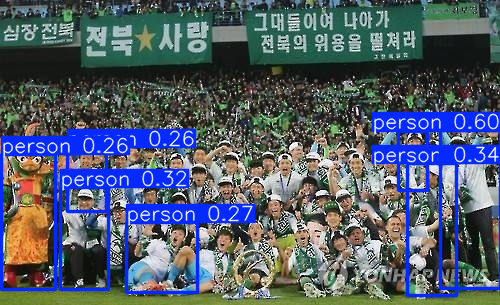

Saved 1 image to runs/detect/exp5


In [ ]:
# 모델과 필요한 라이브러리 임포트
import torch
from IPython.display import Image, display  # Colab에서 이미지 표시용

# 모델 로드 (기본 YOLOv5s 모델)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 이미지 경로
img_path = '/content/yolov5/data/images/dkdkd.jpg'

# 이미지에 대한 예측
results = model(img_path)

# 결과 시각화
results.show()  # Google Colab에서는 자동으로 표시됩니다
results.save()  # 저장된 결과 이미지는 yolov5/runs/detect/exp 디렉토리에 있습니다.


In [ ]:
# 이미지 경로
img_path = '/content/yolov5/data/images/654781804_NZMkxz8D_1.jpg'

# 이미지에 대한 예측
results = model(img_path)

# 결과 시각화
results.show()  # Google Colab에서는 자동으로 표시됩니다


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 이미지 경로
label_path = '/content/yolov5/data/labels/'

# 이미지에 대한 예측
results = model(img_path)

# 결과 시각화
results.show()  # Google Colab에서는 자동으로 표시됩니다
results.save()  # 저장된 결과 이미지는 yolov5/runs/detect/exp 디렉토리에 있습니다.

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Import cv2
import numpy as np

# Yolo load
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes =  [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()

output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

#img load
img = cv2.imread("sample.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y+30), font, 3, color, 3)

cv2.imshow("Image", img)
cv2.waitKey(0)

cv2.destroyAllWindows()

SyntaxError: invalid syntax (<ipython-input-3-f9e69071eb0d>, line 1)